> Họ và tên: Phùng Dũng Quân\
> MSSV: 22280073

# Thư viện

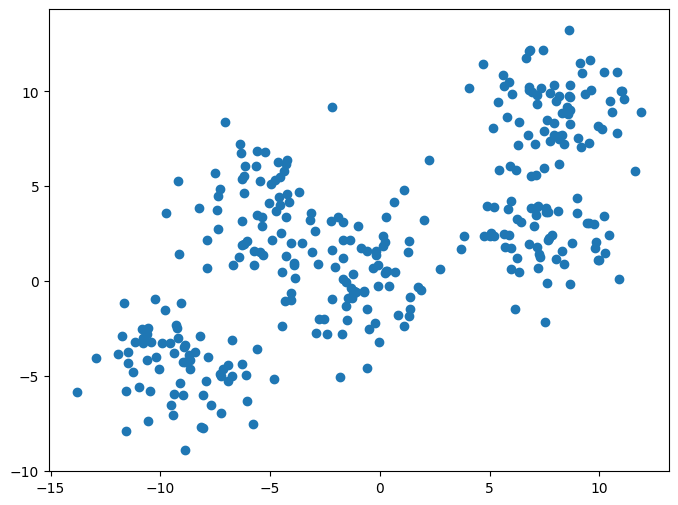

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from pandas import DataFrame
from sklearn.cluster import KMeans

random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show()

In [55]:
gm = GaussianMixture(n_components=5).fit(x)
centers = gm.means_
print(centers)

[[-9.18419799 -4.47855075]
 [ 8.08308692  9.17642055]
 [-0.89184344  0.17602145]
 [-5.55710852  3.87061249]
 [ 7.31671999  2.46693378]]


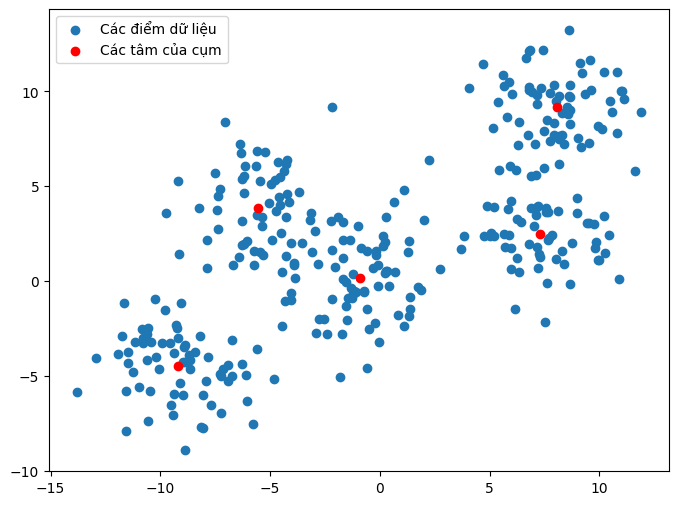

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="Các điểm dữ liệu")
plt.scatter(centers[:,0], centers[:,1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()

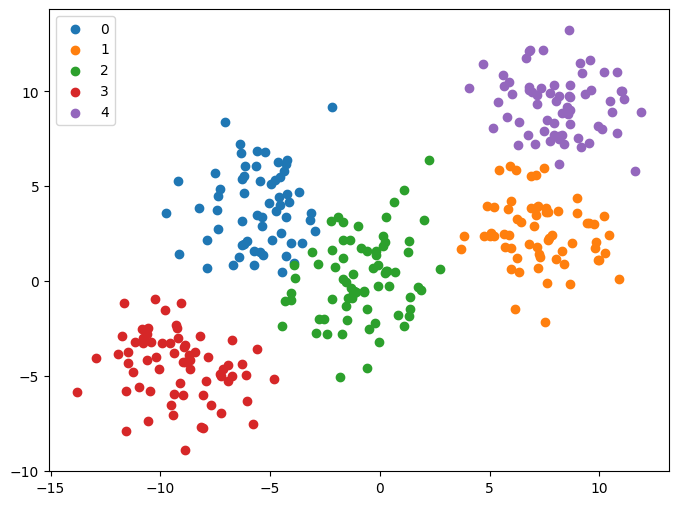

In [6]:
pred = gm.predict(x)

df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

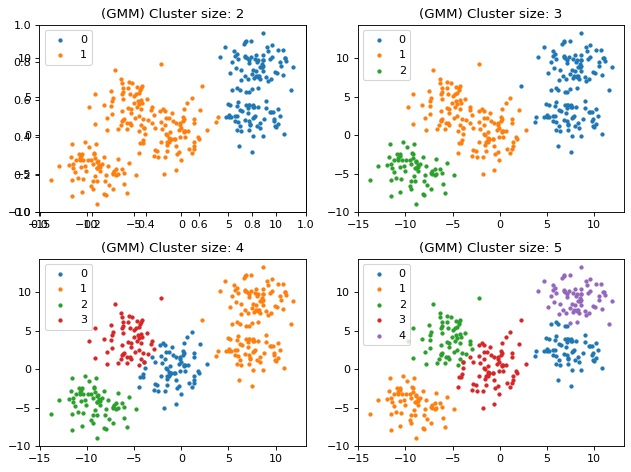

In [7]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(GMM) Cluster size: " + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

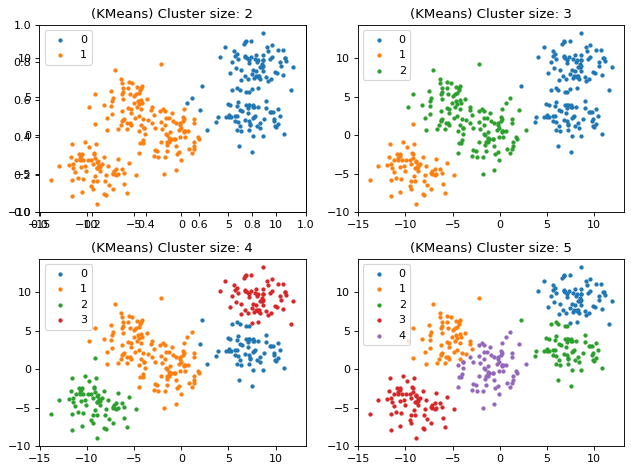

In [8]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    km = KMeans(n_clusters=i).fit(x)
    pred = km.predict(x)
    df = DataFrame({'x': x[:,0], 'y': x[:,1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(KMeans) Cluster size: " + str(i))
    plt.legend()

plt.tight_layout()
plt.show()

# Thuật toán tự viết

In [9]:
import numpy as np

In [65]:
class Mahalanobis:
    def __init__(self, x, n_clusters):
        self.x = x
        self.n_clusters = n_clusters

    def initial_clusters(self):
        random.seed(42)
        initial_clusters = random.choice(len(self.x), self.n_clusters, replace=False)
        return self.x[initial_clusters]
    
    def mahalanobis_distance(self):
        distance_matrix = []
        for i in range(len(x)):
            distances = []
            for j in range(len(self.initial_clusters())):
                diff = x[i] - self.initial_clusters()[j]
                cov_inv = np.linalg.inv(np.cov(x.T))
                distance = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
                distances.append(distance)
            distance_matrix.append(distances)
        return distance_matrix
    
    def labels(self):
        distance_matrix = self.mahalanobis_distance()
        labels = np.argmin(distance_matrix, axis=1)
        return labels
    
    def update_clusters(self):
        # Cập nhật các tâm cụm mới và dừng lại khi các tâm cụm không thay đổi
        clusters = self.initial_clusters()
        old_clusters = clusters.copy()
        labels = self.labels()
        while True:
            new_clusters = []
            for i in range(self.n_clusters):
                cluster_points = self.x[labels == i]
                if len(cluster_points) > 0:
                    new_cluster = np.mean(cluster_points, axis=0)
                    new_clusters.append(new_cluster)
                else:
                    new_clusters.append(clusters[i])
            if np.all(np.array(new_clusters) == old_clusters):
                break
            old_clusters = new_clusters.copy()
            clusters = np.array(new_clusters)
        return clusters
    
mahalanobis = Mahalanobis(x, 5)
initial_clusters = mahalanobis.initial_clusters()
print(initial_clusters)
labels = mahalanobis.labels()
clusters = mahalanobis.update_clusters()
print(clusters)

[[ -4.53691111   4.01857057]
 [-10.59242123  -4.13817785]
 [  8.65487162   9.71289858]
 [  0.126279     2.35522037]
 [-13.78593733  -5.83119475]]
[[ -5.67966888   4.08640844]
 [ -8.93939298  -4.38689081]
 [  8.0169899    9.0189457 ]
 [  2.64727469   1.0991822 ]
 [-12.76497257  -5.91896902]]


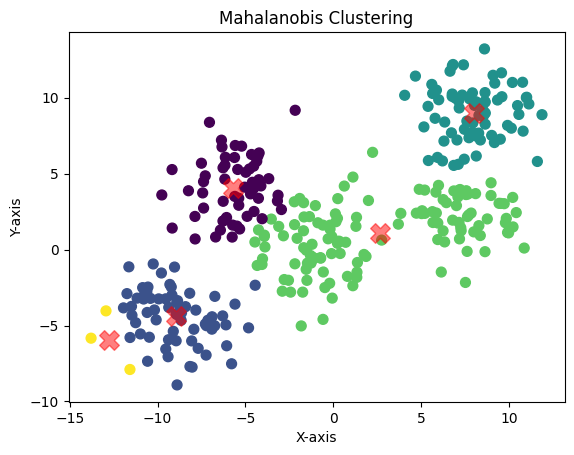

In [66]:
# Plot Mahalanobis clustering
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('Mahalanobis Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()